In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.metrics import make_scorer
import xgboost as xgb

In [2]:
df = pd.read_parquet('c:/fomo_data2/complete_for_models.parquet')
df = df[df['ridership'] != 0]
df.head()

,locationid,ridership,year,month,day,hour,temperature_2m (°C),windspeed_10m (km/h),winddirection_10m (°),sentiment,events
0,2.0,3.0,2023.0,1,1,15.0,1.2,7.1,66.0,0.0,0
1,2.0,1.0,2023.0,1,1,19.0,2.8,6.9,99.0,0.0,0
2,3.0,9.0,2023.0,1,1,0.0,4.3,9.9,327.0,1.0,0
3,3.0,16.0,2023.0,1,1,1.0,3.9,9.0,331.0,1.0,0
4,3.0,12.0,2023.0,1,1,2.0,3.3,8.9,328.0,1.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3210589 entries, 0 to 3222683
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   locationid             float64
 1   ridership              float64
 2   year                   float64
 3   month                  int32  
 4   day                    int32  
 5   hour                   float64
 6   temperature_2m (°C)    float32
 7   windspeed_10m (km/h)   float32
 8   winddirection_10m (°)  float32
 9   sentiment              float64
 10  events                 int64  
dtypes: float32(3), float64(5), int32(2), int64(1)
memory usage: 232.7 MB


In [4]:
print(len(df))
index= df.dropna()
print(len(df))

3210589
3210589


In [5]:
# Find the range of values in the 'ridership' column
min_value = df['ridership'].min()
max_value = df['ridership'].max()
print(f"Range of ridership values: {min_value} to {max_value}")

# Describe the ridership column to get basic statistics
description = df['ridership'].describe()
print(description)

Range of ridership values: 1.0 to 65536.0
count    3.210587e+06
mean     1.054481e+03
std      2.620444e+03
min      1.000000e+00
25%      3.600000e+01
50%      2.430000e+02
75%      9.300000e+02
max      6.553600e+04
Name: ridership, dtype: float64


In [6]:

# Splitting data into features and target
X = df.drop('ridership', axis=1)
y = df['ridership']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Find the indices of NaN values in y_train
nan_indices = y_train[y_train.isna()].index

# Display the indices and corresponding NaN values
print("Indices of NaN values in y_train:")
print(nan_indices)

# Optionally, you can also display the rows in the dataset corresponding to these NaN indices if needed
print("Rows in y_train with NaN values:")
print(y_train.loc[nan_indices])

Indices of NaN values in y_train:
Index([404896], dtype='int64')
Rows in y_train with NaN values:
404896   NaN
Name: ridership, dtype: float64


In [11]:
# Fill NaN values in y_train with the median value
y_train = y_train.fillna(y_train.median())
X_test = X_test.fillna(X_test.median())

# Verify that there are no NaNs left
print("Checking for NaNs in cleaned y_train:")
print(y_train.isna().sum())

Checking for NaNs in cleaned y_train:
0


In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)


y_pred = xgb_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [12]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# Train the model
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
evaluation_metrics = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'R-squared'],
    'Value': [mae, mse, r2]
})
print(evaluation_metrics)

                Metric         Value
0  Mean Absolute Error  4.302352e+02
1   Mean Squared Error  1.395795e+06
2            R-squared  7.962731e-01


In [ ]:
print(len(df))

3222684


In [ ]:
df.nunique()

locationid                 260
ridership                27710
year                         2
month                       12
day                         31
hour                        24
temperature_2m (°C)        444
windspeed_10m (km/h)       340
winddirection_10m (°)      360
sentiment                   69
events                       2
dtype: int64

import pickle
with open('c:/fomo_data2/xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_reg, file)

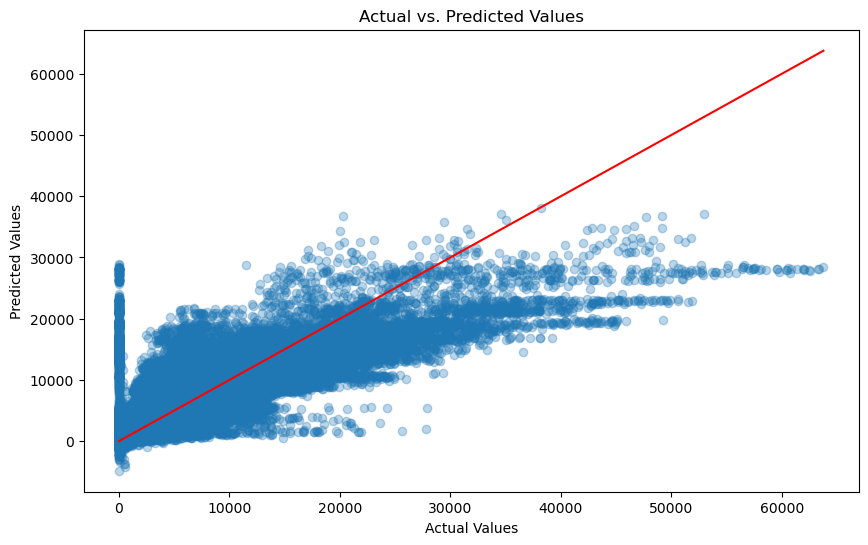

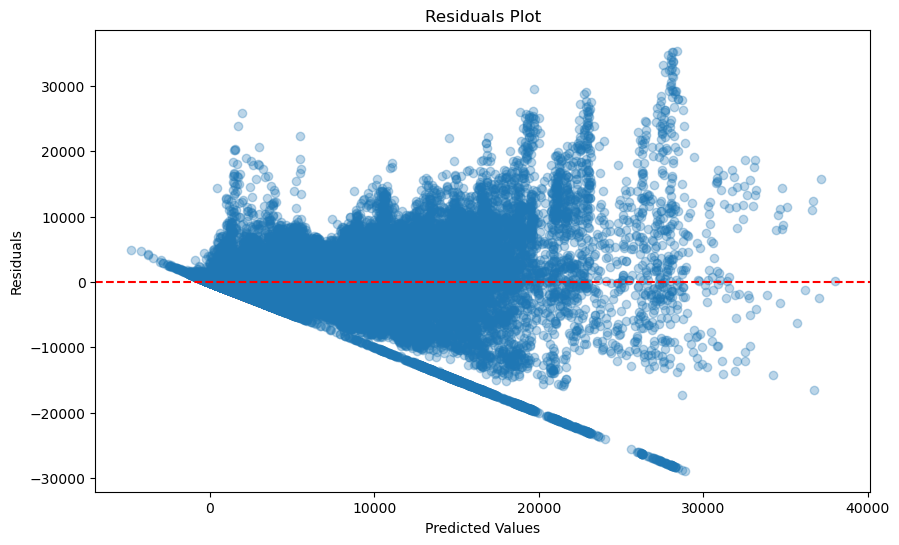

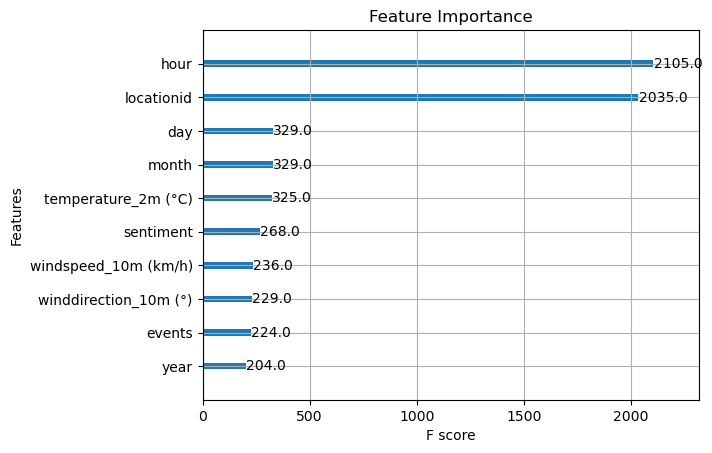

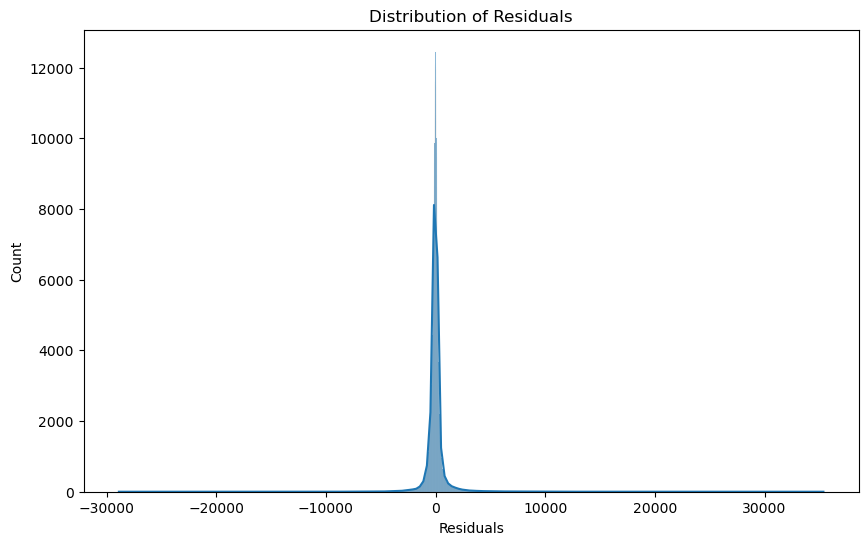

In [ ]:
# Plot Actual and Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

#  Feature Importance Plot
xgb.plot_importance(xgb_reg, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()

#  Distribution of Errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


RMSE: 1181.4376992720584
MAPE: 2911113955794206.0
Explained Variance Score: 0.7962731821170362


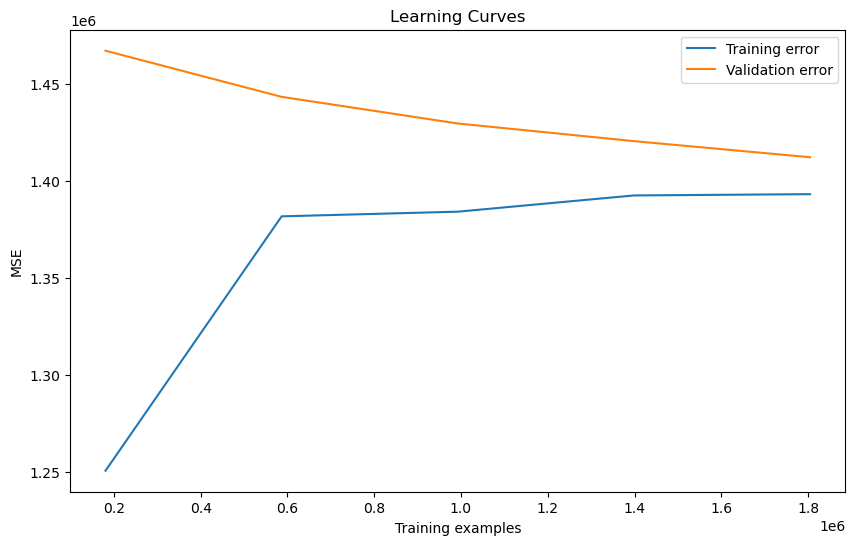

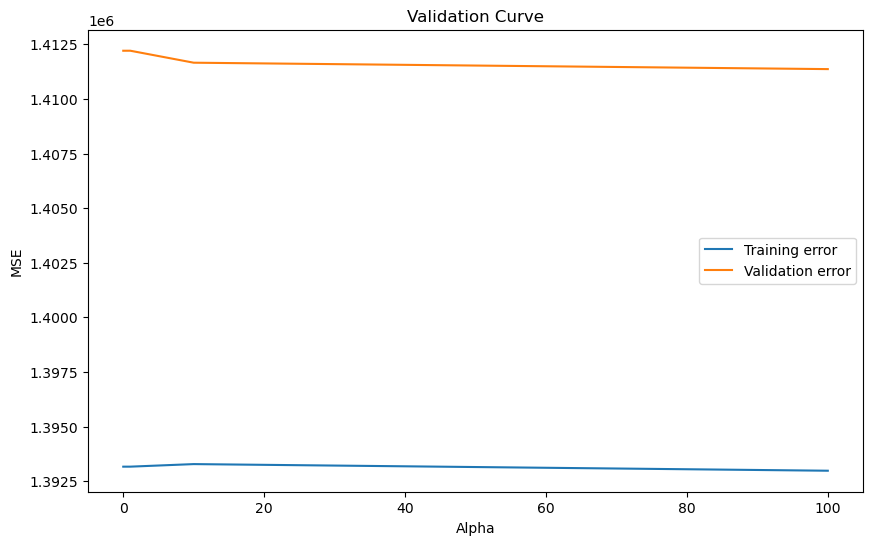

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (c:\Users\Kevin\anaconda3\envs\softwareeng\Lib\site-packages\sklearn\inspection\__init__.py)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score
from sklearn.model_selection import learning_curve, validation_curve
import shap

# Additional evaluation metrics
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"Explained Variance Score: {explained_variance}")

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(xgb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.title('Learning Curves')
plt.legend()
plt.show()

# Validation Curve
param_range = np.logspace(-3, 2, 6)
train_scores, test_scores = validation_curve(xgb_reg, X_train, y_train, param_name="reg_alpha", param_range=param_range, cv=5, scoring="neg_mean_squared_error")
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_mean, label='Training error')
plt.plot(param_range, test_scores_mean, label='Validation error')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Validation Curve')
plt.legend()
plt.show()

# Partial Dependence Plots
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(12, 8))
plot_partial_dependence(xgb_reg, X_train, features=[0, 1], grid_resolution=50, ax=ax)
plt.show()

# SHAP values
explainer = shap.Explainer(xgb_reg)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

# Q-Q Plot
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()'''


In [ ]:
#Doing a PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
xgb_reg = xgb.XGBRegressor()

# pipline
pipeline = Pipeline([
    ('pca', pca),
    ('xgb', xgb_reg)
])


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE after PCA:", rmse)

In [ ]:
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_reg, X, y, cv=5, scoring=rmse_scorer)

print("Cross-Validation RMSE scores:", cv_scores)
print("Mean RMSE:", cv_scores.mean())